### Readme:
**This notebook will take ~45 mins to execute!** (the output files are *train_auxi.csv* and *test_auxi.csv*)<br>
approximate time for each part:
- 1. sg-stock-prices (1 min)
- 2. sg-shopping-malls (5 mins)
- 3. sg-mrt-existing-stations (20 mins)
- 4. sg-coe-prices (1 min)
- 5. sg-mrt-planned-stations (15 mins)
- 6. sg-primary-schools

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans

# Python script for auxiliary functions
import auxiliary as auxi

### Read train data and test data

In [10]:
df_train = pd.read_csv("data/train_auxi.csv") # WHEN FINISH CHANGE BACK TO train.csv
print('Number of train records: {}'.format(len(df_train)))
df_train.head()

Number of train records: 60000


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,elevation,subzone,planning_area,region,monthly_rent,avg_stock_price,num_shopping_malls,min_distance,avg_coe_price,min_distance_planned
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,0.0,yuhua east,jurong east,west region,1600,15.448564,5,0.699301,54951.625,0.673078
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,...,0.0,bedok north,bedok,east region,2250,10.278250,3,0.899077,77035.625,0.904629
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,...,0.0,toa payoh central,toa payoh,central region,1900,8.983589,5,0.218801,89580.250,1.184329
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,...,0.0,pasir ris drive,pasir ris,east region,2850,15.318542,3,1.547366,51997.375,0.513905
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,...,0.0,bendemeer,kallang,central region,2100,9.137518,6,0.187930,99472.875,2.805400


In [11]:
df_test = pd.read_csv("data/test_auxi.csv") # WHEN FINISH CHANGE BACK TO test.csv
print('Number of test records: {}'.format(len(df_test)))
df_test.head()

Number of test records: 30000


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,avg_stock_price,num_shopping_malls,min_distance,avg_coe_price,min_distance_planned
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,9.668867,3,0.821030,92845.000,0.901684
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region,9.344795,3,0.306192,92942.625,8.807935
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region,9.276715,4,1.092259,104442.375,0.740076
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region,15.318542,4,0.361691,51997.375,1.067058
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region,11.224848,5,0.447607,79016.000,0.783658


# 1. sg-stock-prices

## 1.1 Read stock price data

In [16]:
df_stock = pd.read_csv("auxiliary-data/sg-stock-prices.csv")
print('Number of stock records: {}'.format(len(df_stock)))
df_stock.head()

Number of stock records: 35498


,name,symbol,date,open,high,low,close,adjusted_close
0,DBS Group,D05.SI,2021-01-04,25.13,25.34,25.01,25.34,22.833
1,DBS Group,D05.SI,2021-01-05,25.22,25.35,25.09,25.35,22.842
2,DBS Group,D05.SI,2021-01-06,25.30,25.35,25.07,25.18,22.689
3,DBS Group,D05.SI,2021-01-07,25.68,26.18,25.63,26.05,23.473
4,DBS Group,D05.SI,2021-01-08,26.55,27.47,26.50,27.42,24.707


## 1.2 Get average adjusted close price for each year-month

In [18]:
df_stock = auxi.get_avg_adjusted_close(df_stock)
df_stock.head()

,date,adjusted_close
0,2020-12,33.827600
1,2021-01,12.332232
2,2021-02,13.822067
3,2021-03,13.250911
4,2021-04,14.085999


## 1.3 Validate complete coverage of year-month

In [19]:
auxi.is_full_coverage(df_stock, df_train, df_test)

Date in auxi data covers all in train data? True
Date in auxi data covers all in test data? True


## 1.4 Add in new column "avg_stock_price" for train and test data

In [10]:
auxi.insert_col_stock_price(df_stock, df_train)
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,avg_stock_price
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,15.448564
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,10.278250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,8.983589
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,15.318542
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,9.137518


In [11]:
auxi.insert_col_stock_price(df_stock, df_test)
df_test.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,avg_stock_price
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,9.668867
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region,9.344795
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region,9.276715
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region,15.318542
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region,11.224848


# 2. sg-shopping-malls

## 2.1 Read shopping mall data

In [12]:
df_shopping_malls = pd.read_csv("auxiliary-data/sg-shopping-malls.csv")
df_shopping_malls = df_shopping_malls.drop('name', axis=1)
df_shopping_malls.head()

,latitude,longitude
0,1.274588,103.843471
1,1.301385,103.837684
2,1.310867,103.863930
3,1.325596,103.842572
4,1.298141,103.855635


## 2.2 Plot shopping mall and train data on map

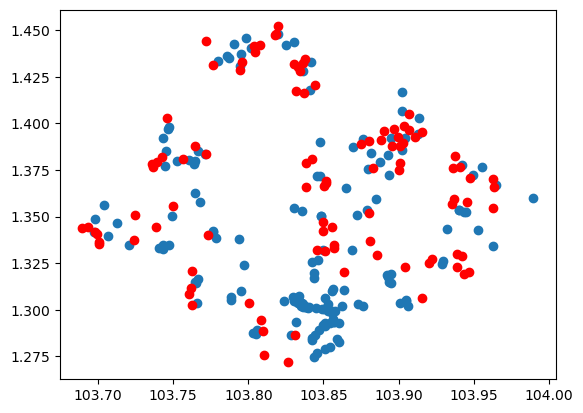

In [13]:
plt.scatter(df_shopping_malls['longitude'], df_shopping_malls['latitude'])
plt.scatter(df_train[:100]['longitude'], df_train[:100]['latitude'], color='r')
plt.show()

# 2.3 KMeans Clutering approach of finding number of shopping malls

In [19]:
%%time
num_list_k_means = auxi.num_shopping_malls_df_Kmeans(df_train, df_shopping_malls)
df_train.head()

/home/navdev2/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: user 3min 26s, sys: 12.8 ms, total: 3min 26s
Wall time: 3min 25s


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,avg_stock_price,num_shopping_malls
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,15.448564,5
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,10.278250,3
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,8.983589,5
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,15.318542,3
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,9.137518,6


In [20]:
# %%time
# num_list_k_means = auxi.num_shopping_malls_df_Kmeans(df_test, df_shopping_malls)
df_test.head()

/home/navdev2/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: user 1min 44s, sys: 472 ms, total: 1min 44s
Wall time: 1min 44s


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,avg_stock_price,num_shopping_malls
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,9.668867,3
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region,9.344795,3
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region,9.276715,4
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region,15.318542,4
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region,11.224848,5


# 3. sg-mrt-existing-stations

## 3.1 Read existing mrt stations data

In [15]:
df_mrt = pd.read_csv("auxiliary-data/sg-mrt-existing-stations.csv")
print('Number of mrt station records: {}'.format(len(df_mrt)))
df_mrt.head()

Number of mrt station records: 162


,code,name,opening_year,latitude,longitude
0,NS1,Jurong East,1990,1.333295,103.742154
1,NS2,Bukit Batok,1990,1.349035,103.749526
2,NS3,Bukit Gombak,1990,1.358663,103.751913
3,NS4,Choa Chu Kang,1990,1.385363,103.744371
4,NS5,Yew Tee,1996,1.397476,103.747418


## 3.2 Calculate the distance (km) to the nearest mrt station

In [ ]:
%%time
df_train['min_distance'] = df_train.apply(lambda row: auxi.calculate_min_distance(row, df_mrt), axis=1)
df_train.head()

In [26]:
%%time
df_test['min_distance'] = df_test.apply(lambda row: auxi.calculate_min_distance(row, df_mrt), axis=1)
df_test.head()

CPU times: user 9min 49s, sys: 32 ms, total: 9min 49s
Wall time: 9min 49s


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,avg_stock_price,num_shopping_malls,min_distance
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,9.668867,3,0.821030
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region,9.344795,3,0.306192
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region,9.276715,4,1.092259
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region,15.318542,4,0.361691
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region,11.224848,5,0.447607


# 4. sg-coe-prices

## 4.1 Read coe price data

In [6]:
df_coe = pd.read_csv("auxiliary-data/sg-coe-prices.csv")
print('Number of COE records: {}'.format(len(df_coe)))
df_coe.head()

Number of COE records: 248


,year,category,month,bidding,price,quota,bids
0,2023,a,july,2,95202,581,728
1,2023,a,july,1,97000,588,756
2,2023,a,june,2,96206,586,751
3,2023,a,june,1,98001,581,881
4,2023,a,may,2,92000,596,936


## 4.2 Convert date format

In [7]:
d = {'january':'01', 'february':'02', 'march':'03', 'april':'04', 'may':'05', 'june':'06', 'july':'07', 'august':'08', 'september':'09', 'october':'10', 'november':'11', 'december':'12'}
df_coe['month'] = df_coe['month'].map(d)
df_coe['date'] = df_coe['year'].astype(str) + '-' + df_coe['month']
df_coe = df_coe[['date', 'price']]
df_coe.head()

,date,price
0,2023-07,95202
1,2023-07,97000
2,2023-06,96206
3,2023-06,98001
4,2023-05,92000


## 4.3 Get average coe price for each year-month

In [8]:
df_coe = auxi.get_avg_coe_price(df_coe)
df_coe.head()

,date,price
0,2021-01,45187.375
1,2021-02,44871.000
2,2021-03,43812.000
3,2021-04,50396.750
4,2021-05,52199.625


## 4.4 Validate complete coverage of year-month

In [9]:
auxi.is_full_coverage(df_coe, df_train, df_test)

Date in auxi data covers all in train data? True
Date in auxi data covers all in test data? True


## 4.5 Add in new column "avg_stock_price" for train and test data

In [10]:
auxi.insert_col_coe_price(df_coe, df_train)
df_train.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,avg_stock_price,num_shopping_malls,min_distance,avg_coe_price
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,15.448564,5,0.699301,54951.625
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,10.278250,3,0.899077,77035.625
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,8.983589,5,0.218801,89580.250
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,15.318542,3,1.547366,51997.375
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,9.137518,6,0.187930,99472.875


In [11]:
auxi.insert_col_coe_price(df_coe, df_test)
df_test.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,avg_stock_price,num_shopping_malls,min_distance,avg_coe_price
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,9.668867,3,0.821030,92845.000
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region,9.344795,3,0.306192,92942.625
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region,9.276715,4,1.092259,104442.375
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region,15.318542,4,0.361691,51997.375
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region,11.224848,5,0.447607,79016.000


# 5. sg-mrt-planned-stations

## 5.1 Read planned mrt stations data

In [6]:
df_mrt = pd.read_csv("auxiliary-data/sg-mrt-planned-stations.csv")
print('Number of mrt station records: {}'.format(len(df_mrt)))
df_mrt.head()

Number of mrt station records: 74


,code,name,opening_year,latitude,longitude
0,NaN,Brickland,2030,1.369700,103.747900
1,NaN,Sungei Kadut,2030,1.413300,103.748800
2,NaN,Punggol Coast,2024,1.415280,103.911110
3,NaN,Bukit Brown,TBA,1.333639,103.830075
4,NaN,Keppel,2026,1.270100,103.831000


## 5.2 Calculate the distance (km) to the nearest mrt station

In [7]:
%%time
df_train['min_distance_planned'] = df_train.apply(lambda row: auxi.calculate_min_distance(row, df_mrt), axis=1)
df_train.head()

CPU times: user 8min 56s, sys: 3.05 s, total: 8min 59s
Wall time: 8min 59s


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,elevation,subzone,planning_area,region,monthly_rent,avg_stock_price,num_shopping_malls,min_distance,avg_coe_price,min_distance_planned
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,0.0,yuhua east,jurong east,west region,1600,15.448564,5,0.699301,54951.625,0.673078
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,...,0.0,bedok north,bedok,east region,2250,10.278250,3,0.899077,77035.625,0.904629
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,...,0.0,toa payoh central,toa payoh,central region,1900,8.983589,5,0.218801,89580.250,1.184329
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,...,0.0,pasir ris drive,pasir ris,east region,2850,15.318542,3,1.547366,51997.375,0.513905
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,...,0.0,bendemeer,kallang,central region,2100,9.137518,6,0.187930,99472.875,2.805400


In [8]:
%%time
df_test['min_distance_planned'] = df_test.apply(lambda row: auxi.calculate_min_distance(row, df_mrt), axis=1)
df_test.head()

CPU times: user 4min 24s, sys: 35.6 ms, total: 4min 24s
Wall time: 4min 24s


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,avg_stock_price,num_shopping_malls,min_distance,avg_coe_price,min_distance_planned
0,2023-01,hougang,245,hougang street 22,5-room,improved,121.0,yes,1984,1.358411,103.891722,0.0,lorong ah soo,hougang,north-east region,9.668867,3,0.821030,92845.000,0.901684
1,2022-09,sembawang,316,sembawang vista,4-room,model a,100.0,yes,1999,1.446343,103.820817,0.0,sembawang central,sembawang,north region,9.344795,3,0.306192,92942.625,8.807935
2,2023-07,clementi,708,Clementi West Street 2,4-room,new generation,91.0,yes,1980,1.305719,103.762168,0.0,clementi west,clementi,west region,9.276715,4,1.092259,104442.375,0.740076
3,2021-08,jurong east,351,Jurong East Street 31,3 room,model a,74.0,yes,1986,1.344832,103.730778,0.0,yuhua west,jurong east,west region,15.318542,4,0.361691,51997.375,1.067058
4,2022-03,jurong east,305,jurong east street 32,5-room,improved,121.0,yes,1983,1.345437,103.735241,0.0,yuhua west,jurong east,west region,11.224848,5,0.447607,79016.000,0.783658


In [9]:
# Final step: export processed train data and test data to auxi .csv files (For EDA)
df_train.to_csv("data/train_auxi.csv", index=False)
df_test.to_csv("data/test_auxi.csv", index=False)